# Credit Banking Spending Patterns and Customer Acquisition.

IMPORTING REQUIRED LIBRARIES : -

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics


In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


LOADING DATASET : -

In [151]:
dataset = pd.ExcelFile("/content/drive/MyDrive/Projects/Dataset/Credit Banking.xlsx")

In [152]:
dataset.sheet_names

['Customer Acqusition', 'Spend', 'Repayment', 'Project_2', 'Curtomer_Info']

In [153]:
cust_acq = pd.read_excel(dataset,'Customer Acqusition')

In [154]:
spend = pd.read_excel(dataset,'Spend')

In [155]:
repayment = pd.read_excel(dataset,'Repayment')

In [156]:
# Top five rows in the dataset
cust_acq.head(5)

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment
0,1,A1,0.92852,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,35.53455,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,11.55931,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,45.82028,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,69.66395,BANGALORE,Platimum,10002,C5,Normal Salary


In [157]:
# Bottom 5 records
cust_acq.tail(5)

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment
95,96,A96,29.63164,CHENNAI,Silver,100000,C19,Salaried_Pvt
96,97,A97,20.61183,TRIVANDRUM,Platimum,10000,C20,Govt
97,98,A98,40.53898,CALCUTTA,Platimum,10001,C21,Normal Salary
98,99,A99,21.58867,CALCUTTA,Platimum,10002,C22,Self Employed
99,100,A100,23.60764,COCHIN,Silver,100000,C5,Salaried_MNC


In [158]:
cust_acq.shape

(100, 8)

In [159]:
cust_acq.columns.values

array(['Sl No:', 'Customer', 'Age', 'City', 'Credit Card Product',
       'Limit', 'Company', 'Segment'], dtype=object)

In [160]:
# checking the data tpye of all the columns
cust_acq.dtypes

Sl No:                   int64
Customer                object
Age                    float64
City                    object
Credit Card Product     object
Limit                    int64
Company                 object
Segment                 object
dtype: object

In [161]:
# Consize summary of dataframe
cust_acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sl No:               100 non-null    int64  
 1   Customer             100 non-null    object 
 2   Age                  100 non-null    float64
 3   City                 100 non-null    object 
 4   Credit Card Product  100 non-null    object 
 5   Limit                100 non-null    int64  
 6   Company              100 non-null    object 
 7   Segment              100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [162]:
# Descriptive statistics of numeric columns
cust_acq.describe()

,Sl No:,Age,Limit
count,100.00000,100.00000,100.00000
mean,50.50000,40.14650,284700.61000
std,29.01149,23.62959,218494.96785
min,1.00000,0.72649,10000.00000
25%,25.75000,20.25414,100000.00000
50%,50.50000,40.54568,300001.50000
75%,75.25000,61.60691,500000.00000
max,100.00000,78.43176,500000.00000


* S1 No is a numerical attribute but it does not play a vital role in analysis it just a count of rows hence we can ignore this column.

* The average age is 40.146505 but there are 22 customers in the dataset who are below 18 years, this is an invalid value for the age column because the age must be at least 18 years to hold a credit card, so they are not eligible to hold the card.Therefore descriptive statistics(25%-50%-75%) is not appropriate.

In [163]:
cust_acq[cust_acq['Age'] < 18].shape

(22, 8)

In [164]:
cust_acq.isnull().sum()

Sl No:                 0
Customer               0
Age                    0
City                   0
Credit Card Product    0
Limit                  0
Company                0
Segment                0
dtype: int64

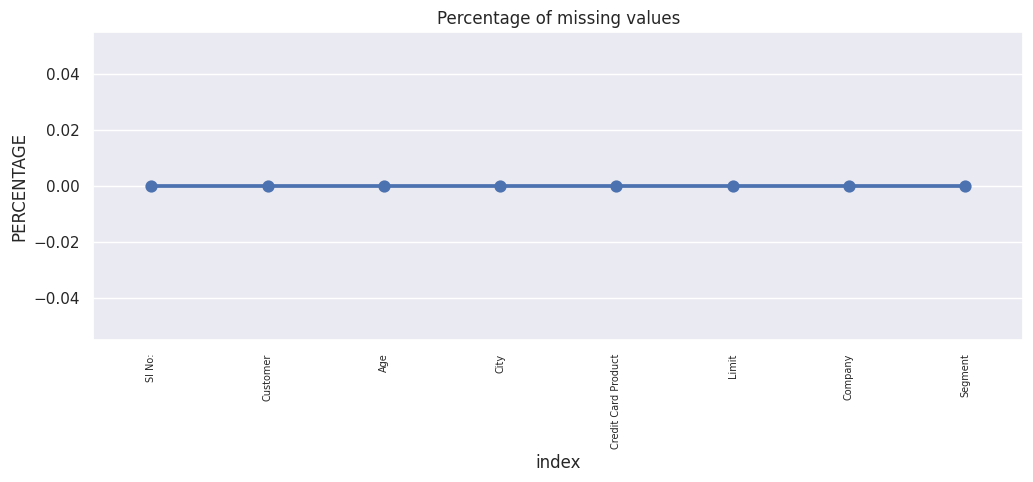

In [165]:
missing = pd.DataFrame((cust_acq.isnull().sum())*100/cust_acq.shape[0]).reset_index()
plt.figure(figsize=(12,4))
ax = sns.pointplot(data=missing, x ='index', y = 0)
plt.xticks(rotation=90,fontsize=7)
plt.title('Percentage of missing values')
plt.ylabel('PERCENTAGE')
plt.show()

**Missing data :- Initial intuition**
 * Here we don't have missing data.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.


Data Cleaning :-




1. create a copy of base data for manupulation & processing.

In [166]:
new_cust_acq = cust_acq.copy()

2. Invalid / Missing data:-
* Provide a meaningful treatment to all values where age is less than 18.

In [167]:
new_cust_acq.loc[new_cust_acq['Age'] < 18]

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment
0,1,A1,0.92852,BANGALORE,Gold,500000,C1,Self Employed
2,3,A3,11.55931,COCHIN,Platimum,10000,C3,Salaried_Pvt
9,10,A10,4.14375,CALCUTTA,Gold,500000,C10,Normal Salary
11,12,A12,11.18248,BOMBAY,Gold,500000,C12,Self Employed
13,14,A14,6.77236,BANGALORE,Gold,500000,C14,Salaried_Pvt
15,16,A16,5.02645,COCHIN,Gold,500000,C16,Normal Salary
18,19,A19,6.57939,BANGALORE,Platimum,10000,C19,Salaried_Pvt
28,29,A29,0.72649,CALCUTTA,Gold,500000,C11,Salaried_Pvt
29,30,A30,5.53783,BANGALORE,Gold,500000,C12,Govt
36,37,A37,10.68334,BANGALORE,Platimum,100003,C19,Normal Salary


As we can see there are 22 customers who are below 18 years of age so we have to handle this invalid data:-

Droping of these records are not a good solution because we only have 100 records if we do so it can be a reason of information loss.
One of the solution is we can impute these entries using mean/median.

As we can see our data is free from outliers. In this case mean can be a good choise to impute.  

In [168]:
# Average age after excluding invalid values for Age
new_cust_acq[new_cust_acq['Age']>=18]['Age'].mean()

49.29242405876662

3. Invalid value Treatment :-

   Average Age = 49.292424

In [169]:
# Imputating Age with Average Age
new_cust_acq.loc[new_cust_acq['Age']<18,'Age']=49.292424

In [170]:
new_cust_acq.loc[new_cust_acq['Age'] < 18]

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment


4. Feature Binning

In [171]:
def Age_bins(df):
  if (df['Age']>=18) and (df['Age']<=35):
    return 'Young'
  elif (df['Age']>35) and (df['Age']<=60):
    return 'Mid Age'
  elif (df['Age']>60):
    return 'Old'

new_cust_acq['Age_Bins']=new_cust_acq.apply(Age_bins,axis=1)

In [172]:
new_cust_acq.head(2)

,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment,Age_Bins
0,1,A1,49.29242,BANGALORE,Gold,500000,C1,Self Employed,Mid Age
1,2,A2,35.53455,CALCUTTA,Silver,100000,C2,Salaried_MNC,Mid Age


5. Remove columns not required for processing.

In [173]:
new_cust_acq.drop(columns=['Sl No:','Age','Company'],axis=1,inplace=True)

In [174]:
new_cust_acq.head(2)

,Customer,City,Credit Card Product,Limit,Segment,Age_Bins
0,A1,BANGALORE,Gold,500000,Self Employed,Mid Age
1,A2,CALCUTTA,Silver,100000,Salaried_MNC,Mid Age


##Spend Dataset

In [175]:
# Top five rows in the dataset
spend.head(5)

,Sl No:,Costomer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,473775.83487
1,2,A1,2004-01-03,PETRO,335578.66602
2,3,A1,2004-01-15,CLOTHES,371040.94191
3,4,A1,2004-01-25,FOOD,141177.81326
4,5,A1,2005-01-17,CAMERA,398403.77181


In [176]:
# Bottom five rows in the dataset
spend.tail(5)

,Sl No:,Costomer,Month,Type,Amount
1495,1496,A67,2006-02-04,BUS TICKET,195841.31222
1496,1497,A68,2006-03-25,BUS TICKET,284262.51771
1497,1498,A69,2006-03-31,BUS TICKET,206552.27360
1498,1499,A70,2006-03-23,BUS TICKET,41024.78128
1499,1500,A71,2006-03-24,BUS TICKET,101397.54859


Check the various attributes of data like shape (rows and columns), Columns, datatypes

In [177]:
spend.shape

(1500, 5)

In [178]:
spend.columns.values

array(['Sl No:', 'Costomer', 'Month', 'Type', 'Amount'], dtype=object)

In [179]:
spend.dtypes

Sl No:               int64
Costomer            object
Month       datetime64[ns]
Type                object
Amount             float64
dtype: object

In [180]:
# Consize summary of dataframe
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sl No:    1500 non-null   int64         
 1   Costomer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Type      1500 non-null   object        
 4   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 58.7+ KB


In [181]:
# Descriptive statistics of numeric columns
spend.describe()

,Sl No:,Amount
count,1500.00000,1500.00000
mean,750.50000,254234.69895
std,433.15702,145872.91904
min,1.00000,783.03215
25%,375.75000,121631.60255
50%,750.50000,262959.08754
75%,1125.25000,381925.38545
max,1500.00000,499682.47046


* S1 No: is a numerical attribute but it does not play a vital role in analysis it just a count of rows hence we can ignore this column.

In [182]:
# Null check
spend.isnull().sum()

Sl No:      0
Costomer    0
Month       0
Type        0
Amount      0
dtype: int64

In [183]:
spend.shape[0]

1500

Data Cleaning :-

1. create a copy of base data for manupulation & processing.

In [184]:
new_spend = spend.copy()

2. Invalid / Missing data:-

<Axes: >

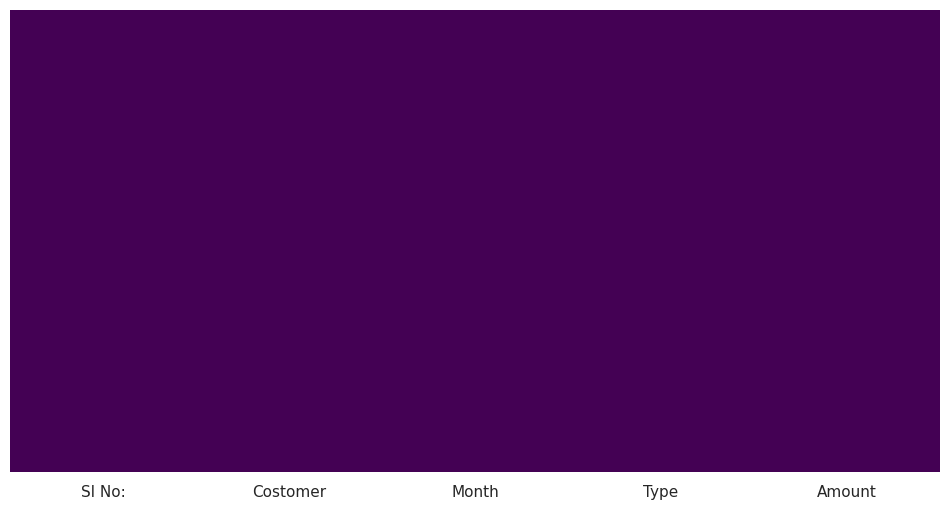

In [185]:
sns.heatmap(new_spend.isnull(),cmap='viridis',cbar=False,yticklabels=False)

**Missing data :- Initial intuition**
 * Here we don't have missing data.
 * This data is already clean. There are no missing/invalid values ​​in the dataset. All columns have the correct datatype.


3. Converting the date into year and month columns as further processing can be easier.

In [186]:
new_spend['year'] = new_spend['Month'].dt.year
new_spend['month'] =new_spend['Month'].dt.month

In [187]:
new_spend.head(2)

,Sl No:,Costomer,Month,Type,Amount,year,month
0,1,A1,2004-01-12,JEWELLERY,473775.83487,2004,1
1,2,A1,2004-01-03,PETRO,335578.66602,2004,1


In [188]:
new_spend.Type.value_counts()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
SHOPPING        113
BUS TICKET       99
JEWELLERY        95
CLOTHES          95
RENTAL           76
MOVIE TICKET     76
BIKE             49
AUTO             40
CAR              30
SANDALS          28
Name: Type, dtype: int64

4. Feature Binning

There are 15 different types of expenses in the dataset. Here we are dividing these expenses into 5 different categories based on the types of budget in India.
So that the distribution plot of types of expenses can be easily understood.

* Housing expenses - RENTAL

* Personal Spending - CLOTHES, SANDALS, SHOPPING, JEWELLERY

* FOOD

* Entertainment - MOVIE TICKET, CAMERA

* Transportation expenses - AIR TICKET, TRAIN TICKET, BUS TICKET, PETRO, AUTO, BIKE, CAR

In [189]:
def category(df):
  if (df['Type'] in ['CLOTHES','SANDALS','SHOPPING','JEWELLERY']):
    return 'Personal Spending'
  elif (df['Type'] in ['AIR TICKET','TRAIN TICKET','BUS TICKET' , 'PETRO','AUTO','BIKE','CAR']):
    return 'Transportation'
  elif (df['Type']=='FOOD'):
    return 'Food'
  elif (df['Type']=='RENTAL'):
    return 'Housing'
  elif (df['Type'] in ['MOVIE TICKET','CAMERA']):
    return 'Entertainment'

new_spend['Category'] = new_spend.apply(category,axis=1)



In [190]:
new_spend.head(2)

,Sl No:,Costomer,Month,Type,Amount,year,month,Category
0,1,A1,2004-01-12,JEWELLERY,473775.83487,2004,1,Personal Spending
1,2,A1,2004-01-03,PETRO,335578.66602,2004,1,Transportation


5. Rename Costomer column as Customer

In [191]:
new_spend.rename(columns = {'Costomer':'Customer'}, inplace = True)

6. Remove columns not required for processing.

In [192]:
new_spend.drop(columns=['Sl No:','Month','Type'],axis=1,inplace=True)

In [193]:
new_spend.head()

,Customer,Amount,year,month,Category
0,A1,473775.83487,2004,1,Personal Spending
1,A1,335578.66602,2004,1,Transportation
2,A1,371040.94191,2004,1,Personal Spending
3,A1,141177.81326,2004,1,Food
4,A1,398403.77181,2005,1,Entertainment


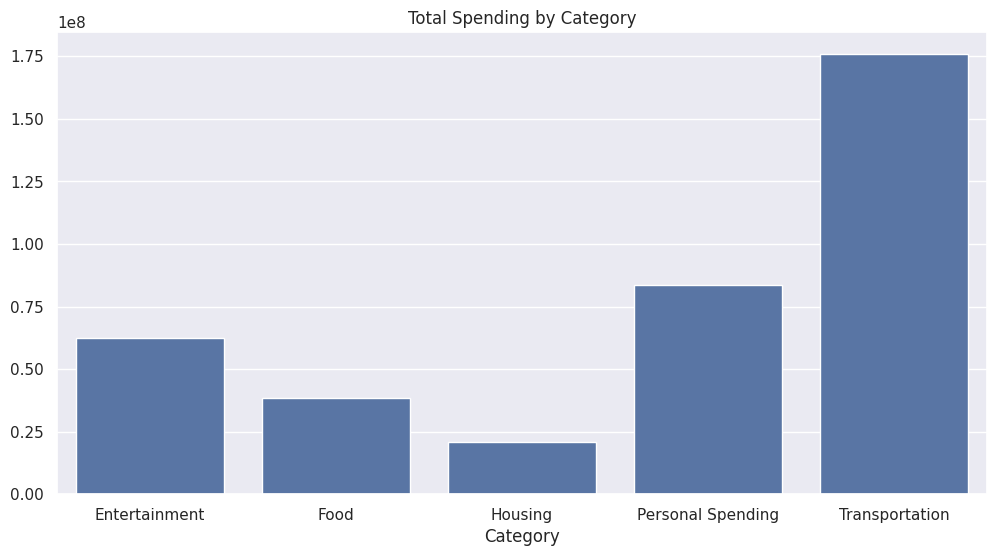

In [194]:
spend_by_type = new_spend.groupby('Category')['Amount'].sum()
sns.barplot(x=spend_by_type.index, y=spend_by_type.values)
plt.title('Total Spending by Category')
plt.show()

Observation : - The category with the highest spending is "Transportation."

In [195]:
spend_summary = new_spend['Amount'].describe()
spend_summary

count     1500.00000
mean    254234.69895
std     145872.91904
min        783.03215
25%     121631.60255
50%     262959.08754
75%     381925.38545
max     499682.47046
Name: Amount, dtype: float64

## Repayment Dataset

In [196]:
repayment.head()

,SL No:,Costomer,Month,Amount
0,1,A1,2004-01-12,331844.00737
1,2,A1,2004-01-03,441139.80733
2,3,A1,2004-01-15,32480.00401
3,4,A1,2004-01-25,90636.96653
4,5,A1,2005-01-17,1581.96983


In [197]:
repayment.tail()

,SL No:,Costomer,Month,Amount
1495,1496,A67,2005-05-09,200288.87406
1496,1497,A68,2006-05-10,231194.70229
1497,1498,A69,2006-07-11,391195.61584
1498,1499,A70,2005-08-12,357629.61819
1499,1500,A71,2004-09-13,179771.74525


In [198]:
repayment.shape

(1500, 4)

In [199]:
repayment.columns.values

array(['SL No:', 'Costomer', 'Month', 'Amount'], dtype=object)

In [200]:
repayment.dtypes

SL No:               int64
Costomer            object
Month       datetime64[ns]
Amount             float64
dtype: object

In [201]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SL No:    1500 non-null   int64         
 1   Costomer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 47.0+ KB


In [202]:
repayment.describe()

,SL No:,Amount
count,1500.00000,1500.00000
mean,750.50000,247472.29608
std,433.15702,143530.64848
min,1.00000,183.21820
25%,375.75000,120422.87237
50%,750.50000,247332.61656
75%,1125.25000,369014.87321
max,1500.00000,499344.94017


In [203]:
repayment.isnull().sum()

SL No:      0
Costomer    0
Month       0
Amount      0
dtype: int64

In [204]:
repayment.shape[0]

1500

Data Cleaning :-

1. create a copy of base data for manupulation & processing.

In [205]:
new_repayment = repayment.copy()

2. Invalid / Missing data:-

In [206]:
[features for features in new_repayment.columns if new_repayment[features].isnull().sum()>0]

[]

**Missing data :- Initial intuition**
 * Here we don't have missing data.
 * This data is already clean. There are no missing/invalid values ​​in the dataset. All columns have the correct datatype.


3. Converting the date into year and month columns as further processing can be easier.

In [207]:
new_repayment['year'] = new_repayment['Month'].dt.year
new_repayment['month'] =new_repayment['Month'].dt.month

4. Rename Costomer column as Customer

In [208]:
new_repayment.rename(columns = {'Costomer':'Customer'}, inplace = True)

5. Remove columns not required for processing.

In [209]:
new_repayment.drop(columns=['SL No:','Month'],axis=1,inplace=True)

In [210]:
new_repayment.head()

,Customer,Amount,year,month
0,A1,331844.00737,2004,1
1,A1,441139.80733,2004,1
2,A1,32480.00401,2004,1
3,A1,90636.96653,2004,1
4,A1,1581.96983,2005,1


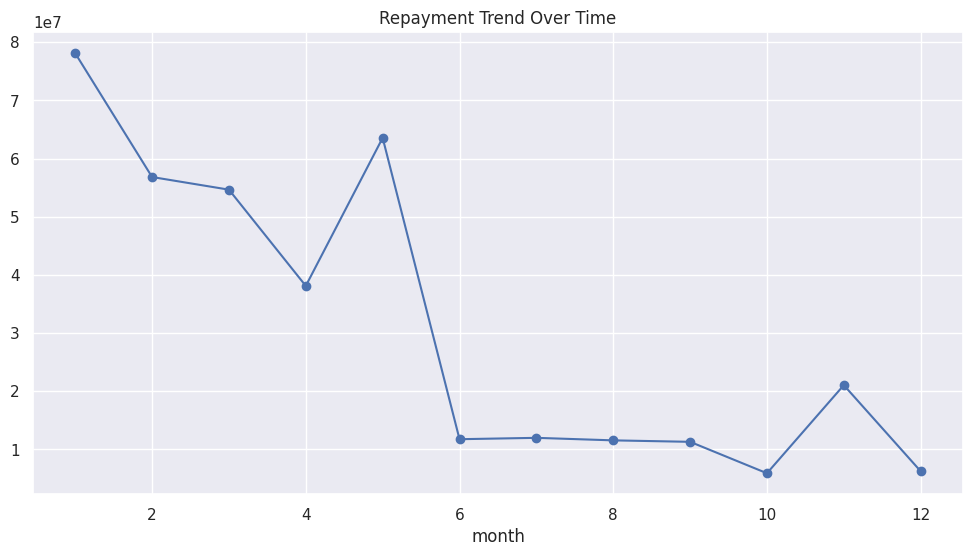

In [211]:
repayment_by_month = new_repayment.groupby('month')['Amount'].sum()
repayment_by_month.plot(kind='line', marker='o')
plt.title('Repayment Trend Over Time')
plt.show()

Observation :- Repayment tends to be high in January and relatively low in October.

In [212]:
repayment_summary = new_repayment['Amount'].describe()
repayment_summary

count     1500.00000
mean    247472.29608
std     143530.64848
min        183.21820
25%     120422.87237
50%     247332.61656
75%     369014.87321
max     499344.94017
Name: Amount, dtype: float64

## Merge Customer and Spend , Customer and Repayment

In [213]:
new_spend.head()

,Customer,Amount,year,month,Category
0,A1,473775.83487,2004,1,Personal Spending
1,A1,335578.66602,2004,1,Transportation
2,A1,371040.94191,2004,1,Personal Spending
3,A1,141177.81326,2004,1,Food
4,A1,398403.77181,2005,1,Entertainment


In [214]:
new_cust_acq.head()

,Customer,City,Credit Card Product,Limit,Segment,Age_Bins
0,A1,BANGALORE,Gold,500000,Self Employed,Mid Age
1,A2,CALCUTTA,Silver,100000,Salaried_MNC,Mid Age
2,A3,COCHIN,Platimum,10000,Salaried_Pvt,Mid Age
3,A4,BOMBAY,Platimum,10001,Govt,Mid Age
4,A5,BANGALORE,Platimum,10002,Normal Salary,Old


In [215]:
new_repayment.head()

,Customer,Amount,year,month
0,A1,331844.00737,2004,1
1,A1,441139.80733,2004,1
2,A1,32480.00401,2004,1
3,A1,90636.96653,2004,1
4,A1,1581.96983,2005,1


In [216]:
cust_spend = pd.merge(new_cust_acq,new_spend,on='Customer',how = 'inner')
cust_repayment = pd.merge(new_cust_acq,new_repayment,on='Customer',how = 'inner')

In [217]:
f = {'Amount': 'sum', 'Limit':'first', 'City': 'first', 'Credit Card Product': 'first','Segment': 'first','Age_Bins':'first'}
df = cust_spend.groupby(['Customer','year','month'],as_index=False).agg(f)
df1 =cust_repayment.groupby(['Customer','year','month'],as_index=False).agg(f)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [218]:
df.head()

,Customer,year,month,Amount,Limit,City,Credit Card Product,Segment,Age_Bins
0,A1,2004,1,1511172.74628,500000,BANGALORE,Gold,Self Employed,Mid Age
1,A1,2004,2,41381.10587,500000,BANGALORE,Gold,Self Employed,Mid Age
2,A1,2004,5,131196.58782,500000,BANGALORE,Gold,Self Employed,Mid Age
3,A1,2005,1,398403.77181,500000,BANGALORE,Gold,Self Employed,Mid Age
4,A1,2005,2,1404193.04192,500000,BANGALORE,Gold,Self Employed,Mid Age


In [219]:
df1.head()

,Customer,year,month,Amount,Limit,City,Credit Card Product,Segment,Age_Bins
0,A1,2004,1,1362775.23512,500000,BANGALORE,Gold,Self Employed,Mid Age
1,A1,2004,2,191180.01162,500000,BANGALORE,Gold,Self Employed,Mid Age
2,A1,2005,1,1581.96983,500000,BANGALORE,Gold,Self Employed,Mid Age
3,A1,2005,2,1199807.62455,500000,BANGALORE,Gold,Self Employed,Mid Age
4,A1,2005,7,300581.70307,500000,BANGALORE,Gold,Self Employed,Mid Age


## Merge Customer , Spend, Repayment dataset

In [226]:
final_df=pd.merge(df,df1,how = 'outer',on=['Customer', 'year', 'month', 'City',
       'Credit Card Product', 'Segment', 'Age_Bins'])

In [227]:
final_df.head()

,Customer,year,month,Amount_x,Limit_x,City,Credit Card Product,Segment,Age_Bins,Amount_y,Limit_y
0,A1,2004,1,1511172.74628,500000.00000,BANGALORE,Gold,Self Employed,Mid Age,1362775.23512,500000.00000
1,A1,2004,2,41381.10587,500000.00000,BANGALORE,Gold,Self Employed,Mid Age,191180.01162,500000.00000
2,A1,2004,5,131196.58782,500000.00000,BANGALORE,Gold,Self Employed,Mid Age,NaN,NaN
3,A1,2005,1,398403.77181,500000.00000,BANGALORE,Gold,Self Employed,Mid Age,1581.96983,500000.00000
4,A1,2005,2,1404193.04192,500000.00000,BANGALORE,Gold,Self Employed,Mid Age,1199807.62455,500000.00000


In [228]:
final_df.tail()

,Customer,year,month,Amount_x,Limit_x,City,Credit Card Product,Segment,Age_Bins,Amount_y,Limit_y
1097,A8,2006,1,NaN,NaN,PATNA,Silver,Salaried_Pvt,Old,318311.37941,100002.00000
1098,A8,2006,2,NaN,NaN,PATNA,Silver,Salaried_Pvt,Old,148411.55803,100002.00000
1099,A8,2006,4,NaN,NaN,PATNA,Silver,Salaried_Pvt,Old,126099.41716,100002.00000
1100,A8,2006,5,NaN,NaN,PATNA,Silver,Salaried_Pvt,Old,80652.48295,100002.00000
1101,A9,2004,2,NaN,NaN,CHENNAI,Silver,Govt,Young,384894.32103,100003.00000


In [229]:
final_df.shape

(1102, 11)

In [230]:
final_df.columns.values

array(['Customer', 'year', 'month', 'Amount_x', 'Limit_x', 'City',
       'Credit Card Product', 'Segment', 'Age_Bins', 'Amount_y',
       'Limit_y'], dtype=object)

In [231]:
final_df.dtypes

Customer                object
year                     int64
month                    int64
Amount_x               float64
Limit_x                float64
City                    object
Credit Card Product     object
Segment                 object
Age_Bins                object
Amount_y               float64
Limit_y                float64
dtype: object

In [232]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1101
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer             1102 non-null   object 
 1   year                 1102 non-null   int64  
 2   month                1102 non-null   int64  
 3   Amount_x             807 non-null    float64
 4   Limit_x              807 non-null    float64
 5   City                 1102 non-null   object 
 6   Credit Card Product  1102 non-null   object 
 7   Segment              1102 non-null   object 
 8   Age_Bins             1102 non-null   object 
 9   Amount_y             798 non-null    float64
 10  Limit_y              798 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 103.3+ KB


In [233]:
final_df.describe()

,year,month,Amount_x,Limit_x,Amount_y,Limit_y
count,1102.00000,1102.00000,807.00000,807.00000,798.00000,798.00000
mean,2005.18149,5.44102,472555.20252,294015.49814,465173.48888,285677.35464
std,0.77172,3.39734,406272.60711,216707.74167,407606.00158,216498.77998
min,2004.00000,1.00000,783.03215,10000.00000,247.09859,10000.00000
25%,2005.00000,2.00000,195325.26492,100000.00000,192081.28300,100000.00000
50%,2005.00000,5.00000,374361.37232,500000.00000,357138.06777,300001.50000
75%,2006.00000,8.00000,589212.84001,500000.00000,604104.63986,500000.00000
max,2006.00000,12.00000,2605014.77842,500000.00000,3026775.83710,500000.00000


Observation:-
* The average limit is ₹ 297993.95 while 75% of customers have a credit card limit of ₹ 500000 per month  Which is the maximum.
* 75% customers have spending less than ₹ 381925.3

In [234]:
final_df.isnull().sum()

Customer                 0
year                     0
month                    0
Amount_x               295
Limit_x                295
City                     0
Credit Card Product      0
Segment                  0
Age_Bins                 0
Amount_y               304
Limit_y                304
dtype: int64

In [235]:
[features for features in final_df.columns if final_df[features].isnull().sum()>0]

['Amount_x', 'Limit_x', 'Amount_y', 'Limit_y']

<Axes: >

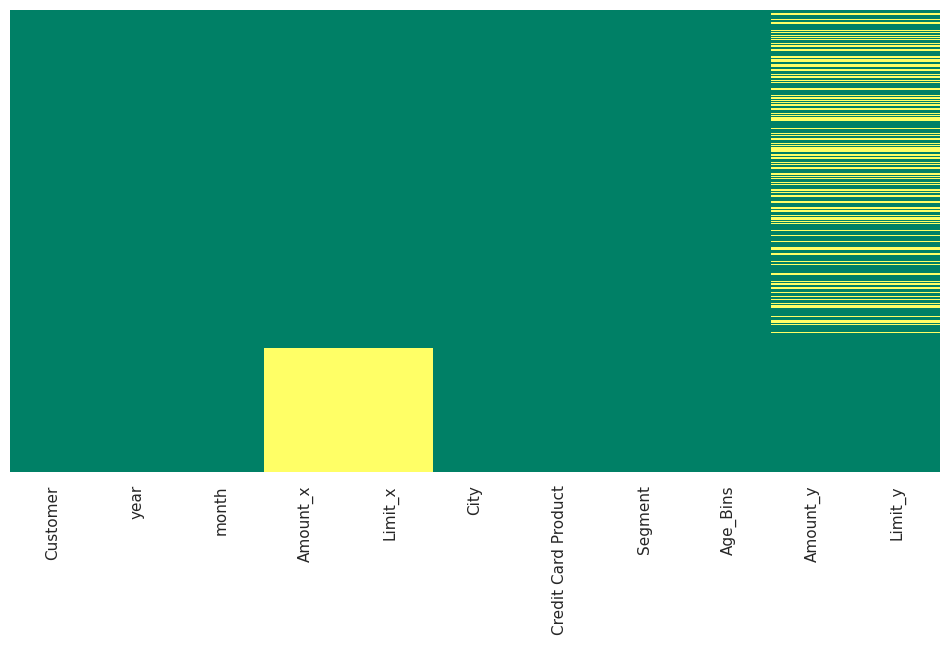

In [236]:
sns.heatmap(final_df.isnull(),cmap='summer',cbar=False,yticklabels=False)

In [237]:
final_df.City.value_counts()

COCHIN        225
BANGALORE     214
CALCUTTA      182
BOMBAY        161
CHENNAI        89
DELHI          78
TRIVANDRUM     77
PATNA          76
Name: City, dtype: int64

In [238]:
final_df.Segment.value_counts()

Normal Salary    327
Govt             202
Salaried_Pvt     200
Self Employed    196
Salaried_MNC     177
Name: Segment, dtype: int64

In [239]:
final_df.Age_Bins.value_counts()

Mid Age    594
Old        369
Young      139
Name: Age_Bins, dtype: int64

In [240]:
final_df['Credit Card Product'].value_counts()

Platimum    433
Gold        424
Silver      245
Name: Credit Card Product, dtype: int64

## Sanity Checks
Data Cleaning :-

**1.** Create a copy of base data for manupulation & processing

In [241]:
new_final_df = final_df.copy()

**3.** Missing / Invalid data

In [242]:
new_final_df.isnull().sum()

Customer                 0
year                     0
month                    0
Amount_x               295
Limit_x                295
City                     0
Credit Card Product      0
Segment                  0
Age_Bins                 0
Amount_y               304
Limit_y                304
dtype: int64

In [243]:
new_final_df.shape[0]

1102

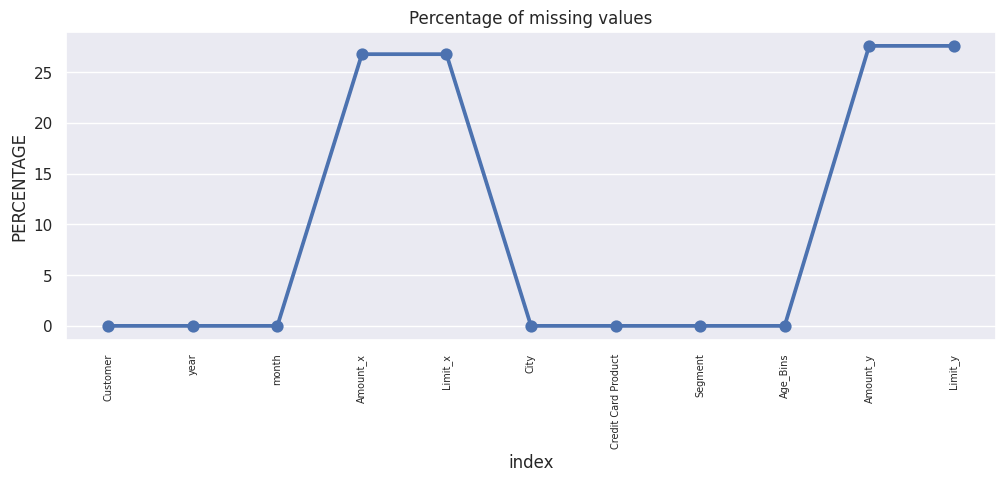

In [244]:
missing = pd.DataFrame((new_final_df.isnull().sum())*100/new_final_df.shape[0]).reset_index()
plt.figure(figsize=(12,4))
ax = sns.pointplot(data=missing, x ='index', y = 0)
plt.xticks(rotation=90,fontsize=7)
plt.title('Percentage of missing values')
plt.ylabel('PERCENTAGE')
plt.show()

### Missing Data - Initial Intuition

* As we can see that four columns like 'Amount_x', 'Limit_x', 'Amount_y', 'Limit_y' have NULL values. So we have to handle them before further processing.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

4. Missing Data Treatement :-

 1. Amount_x is basically the amount that is being spent by the customer and Limit_x and Limit_y both are the credit card limit and Amount_y is actually the amount that is being paid by the customer to the bank.

 2. If we recall there are no missing values ​in the datasets (customer_info, spend, repayment), these missing values ​​are due to the merge operation.

 3. Here we impute Amount_x and Amount_y with fillna(0) or impute with zero because in some months the expenditure of the customer is zero but the amount paid by the customer to the bank in that month is not zero, this is where Amount_x has NaN value and in some months the customer's payment to the bank is zero but the amount spent by the customer in that month is not zero, this is where Amount_y has NaN value.

 4. And Limit_x or Limit_y, we can take any one column and apply that column NaN value with other columns as the credit card limit for the respective customer will be same during repayment and spend.

In [245]:
# Impute Limit_x with corresponding value of Limit_y
new_final_df.Limit_x.fillna(new_final_df.Limit_y, inplace=True)

In [246]:
# Impute Amount_x and Amount_y with fillna(0)
new_final_df.fillna(0,inplace=True)


In [247]:
new_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1101
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer             1102 non-null   object 
 1   year                 1102 non-null   int64  
 2   month                1102 non-null   int64  
 3   Amount_x             1102 non-null   float64
 4   Limit_x              1102 non-null   float64
 5   City                 1102 non-null   object 
 6   Credit Card Product  1102 non-null   object 
 7   Segment              1102 non-null   object 
 8   Age_Bins             1102 non-null   object 
 9   Amount_y             1102 non-null   float64
 10  Limit_y              1102 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 103.3+ KB


**5.** Removing Duplicate Columns

In [248]:
new_final_df.drop(columns=['Limit_y'],inplace=True)

**6.** Rename the column name Amount_x to 'Spend_Amount', Amount_y to 'Repayment_Amount' and Limit to 'Credit_Limit' as it is more readable/understandable for the end user.

In [249]:
new_final_df.rename(columns={'Amount_x':'Spend_Amount','Amount_y':'Repayment_Amount','Limit_x':'Credit_Limit'},inplace=True)

In [250]:
new_final_df.head()

,Customer,year,month,Spend_Amount,Credit_Limit,City,Credit Card Product,Segment,Age_Bins,Repayment_Amount
0,A1,2004,1,1511172.74628,500000.00000,BANGALORE,Gold,Self Employed,Mid Age,1362775.23512
1,A1,2004,2,41381.10587,500000.00000,BANGALORE,Gold,Self Employed,Mid Age,191180.01162
2,A1,2004,5,131196.58782,500000.00000,BANGALORE,Gold,Self Employed,Mid Age,0.00000
3,A1,2005,1,398403.77181,500000.00000,BANGALORE,Gold,Self Employed,Mid Age,1581.96983
4,A1,2005,2,1404193.04192,500000.00000,BANGALORE,Gold,Self Employed,Mid Age,1199807.62455


In [251]:
new_final_df.loc[new_final_df.Spend_Amount > new_final_df.Credit_Limit]

,Customer,year,month,Spend_Amount,Credit_Limit,City,Credit Card Product,Segment,Age_Bins,Repayment_Amount
0,A1,2004,1,1511172.74628,500000.00000,BANGALORE,Gold,Self Employed,Mid Age,1362775.23512
4,A1,2005,2,1404193.04192,500000.00000,BANGALORE,Gold,Self Employed,Mid Age,1199807.62455
7,A1,2006,4,564506.85694,500000.00000,BANGALORE,Gold,Self Employed,Mid Age,371273.27436
9,A10,2004,1,747428.09192,500000.00000,CALCUTTA,Gold,Normal Salary,Mid Age,1149997.08363
13,A10,2005,5,696067.27853,500000.00000,CALCUTTA,Gold,Normal Salary,Mid Age,895696.17464
...,...,...,...,...,...,...,...,...,...,...
796,A9,2006,7,476269.15115,100003.00000,CHENNAI,Silver,Govt,Young,0.00000
803,A96,2004,1,320363.53570,100000.00000,CHENNAI,Silver,Salaried_Pvt,Young,110139.01415
804,A97,2004,1,164330.04227,10000.00000,TRIVANDRUM,Platimum,Govt,Young,174606.39228
805,A98,2004,1,87483.51199,10001.00000,CALCUTTA,Platimum,Normal Salary,Mid Age,97802.59900


* As we can see above, out of total 1102 records, there are 480 records in which the amount spent exceeds the actual credit limit. So we will have to impose some penality on the credit limit.

7. Feature Creation -
  1. Penality
  2. Cashback

In [252]:
new_final_df.loc[new_final_df.Spend_Amount > new_final_df.Credit_Limit,'Penality'] = (new_final_df.Credit_Limit*0.02)

In [253]:
new_final_df.loc[new_final_df.Repayment_Amount > new_final_df.Spend_Amount,'Cashback'] = (new_final_df.Credit_Limit * 0.02)

8. Handling Invalid values -
* 1.Identify where monthly spend is more than the limit and then impose a 2% of penalty of credit limit.

* 2.Identity where the repayment is more than the spend then give them a credit of 2% of their credit
limit in the next month biling.

In [254]:
# Charge a penalty of 2% of the credit limit.
new_final_df.loc[new_final_df.Spend_Amount > new_final_df.Credit_Limit,'New_Limit'] = (new_final_df.Credit_Limit - (new_final_df.Penality))

In [255]:
# credit of 2% of their credit limit in the next month biling.
new_final_df.loc[new_final_df.Spend_Amount > new_final_df.Credit_Limit,'New_Limit'] = (new_final_df.Credit_Limit + (new_final_df.Cashback))

In [256]:
# Drop Credit_Limit column

In [257]:
new_final_df.drop(columns=['Credit_Limit'],inplace=True)

In [258]:
new_final_df.isnull().sum()

Customer                 0
year                     0
month                    0
Spend_Amount             0
City                     0
Credit Card Product      0
Segment                  0
Age_Bins                 0
Repayment_Amount         0
Penality               622
Cashback               570
New_Limit              960
dtype: int64

The dataset contains NaN values ​​due to creating two new features Penality and Cashback.

Imputing these NaN values with fillna(0) because -

* In some places, no penalty is levied by the bank if the customer's spending is within or equal to the credit card limit.
And in some places the customer's repayment is equal to or less than the amount spent, so no cashback is given to the customer by the bank.

In [259]:
# Impute Cashback and Penality with fillna(0)
new_final_df.fillna(0,inplace=True)

In [260]:
new_final_df.isnull().sum()

Customer               0
year                   0
month                  0
Spend_Amount           0
City                   0
Credit Card Product    0
Segment                0
Age_Bins               0
Repayment_Amount       0
Penality               0
Cashback               0
New_Limit              0
dtype: int64

9. Removing features not required -  
 Since all the columns are equally important for further processing, hence we will not drop any column during the data cleaning process. Since we have already done this process for individual datasets, the data is now almost clean.

## Exploratory data analysis(EDA) - Data Exploration
**1. ** Plot distibution of individual predictors

### Univariate Analysis

In [261]:
new_final_df.head(2)

,Customer,year,month,Spend_Amount,City,Credit Card Product,Segment,Age_Bins,Repayment_Amount,Penality,Cashback,New_Limit
0,A1,2004,1,1511172.74628,BANGALORE,Gold,Self Employed,Mid Age,1362775.23512,10000.00000,0.00000,0.00000
1,A1,2004,2,41381.10587,BANGALORE,Gold,Self Employed,Mid Age,191180.01162,0.00000,10000.00000,0.00000


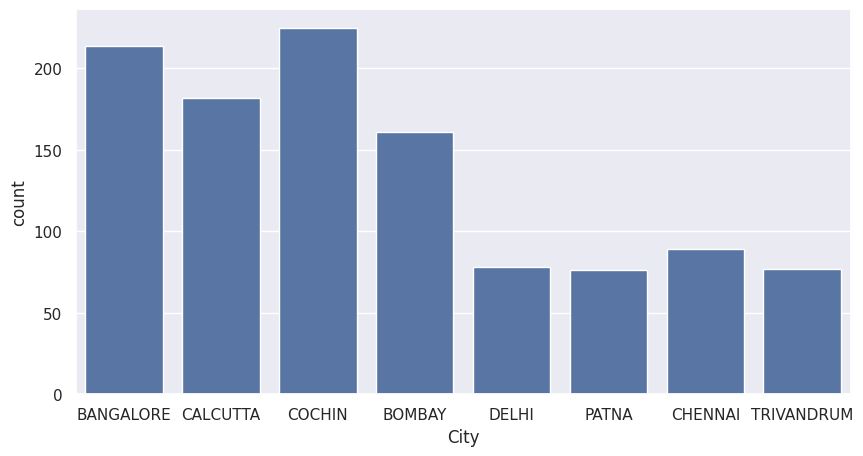

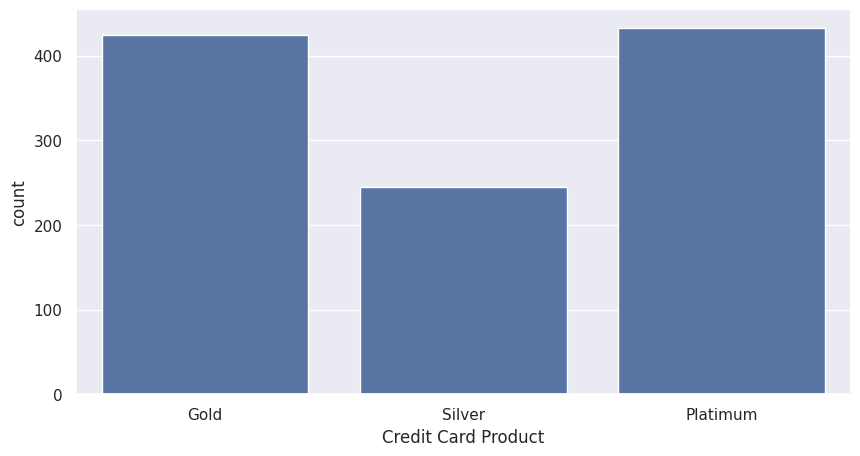

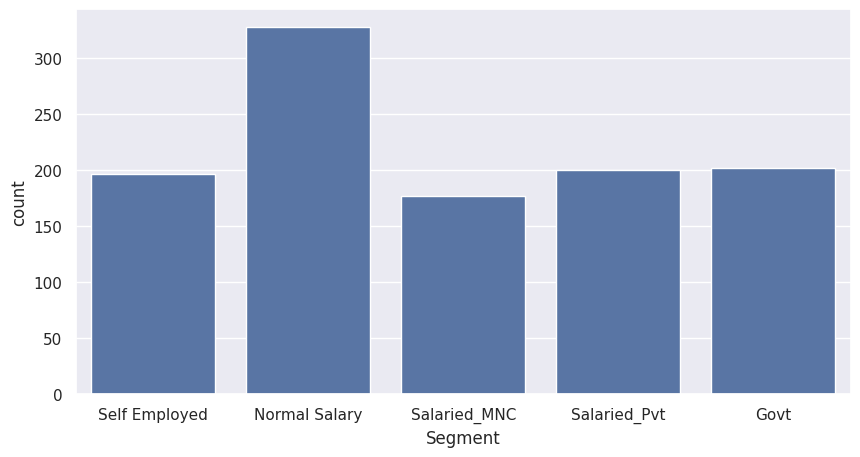

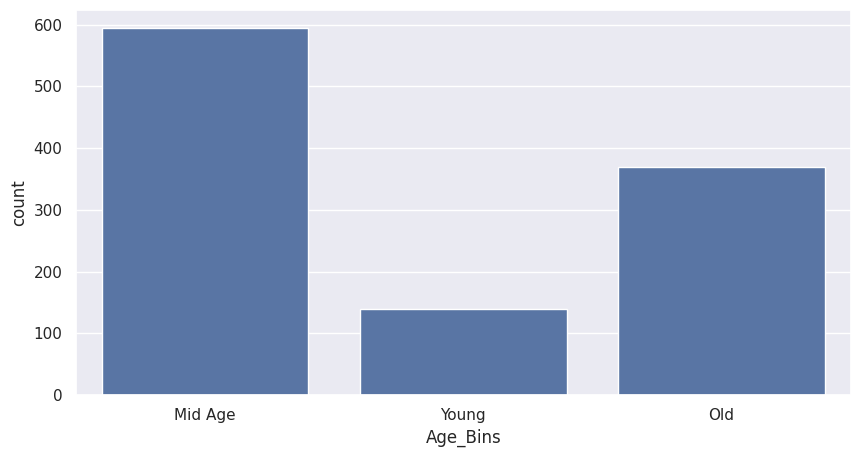

In [262]:
for i, predictor in enumerate(new_final_df.drop(columns=['year', 'month', 'Customer','New_Limit','Spend_Amount','Repayment_Amount','Penality','Cashback'])):
    plt.figure(i,figsize =(10,5))
    sns.countplot(data=new_final_df, x=predictor)

<Axes: xlabel='Category', ylabel='Count'>

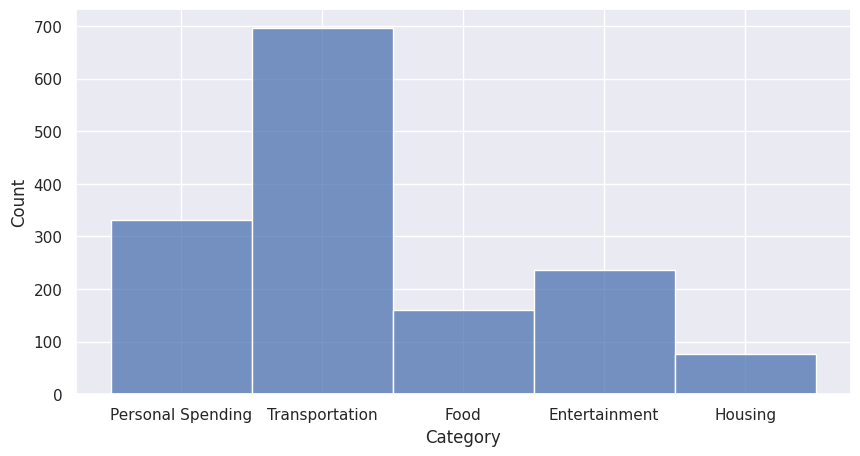

In [263]:
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(cust_spend['Category'])


###Bivariate Analysis

([0, 1, 2], [Text(0, 0, 'Gold'), Text(1, 0, 'Silver'), Text(2, 0, 'Platimum')])

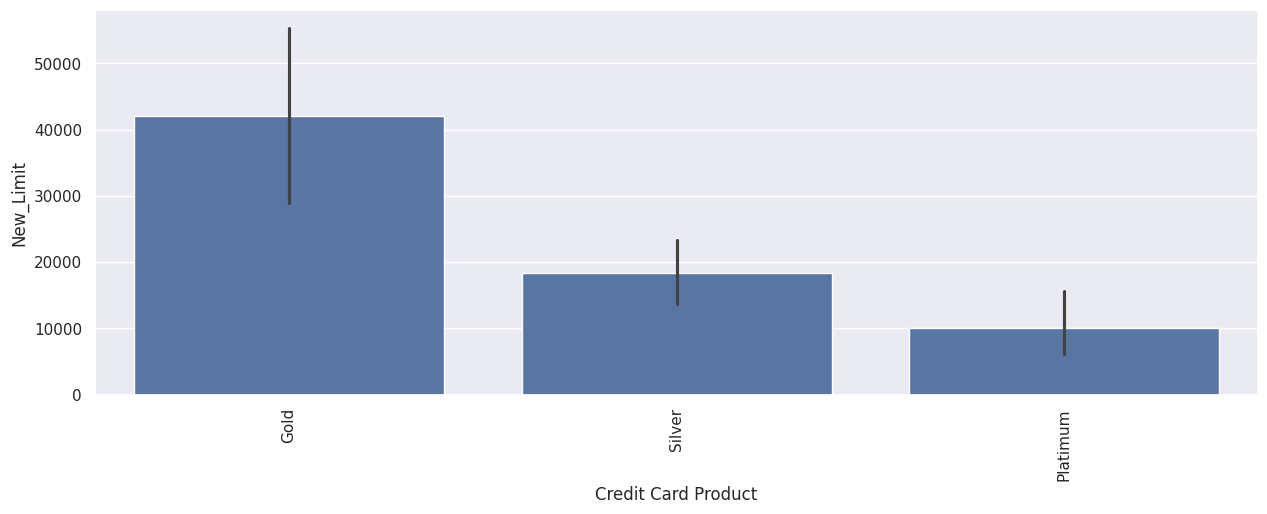

In [264]:
plt.figure(figsize=(15, 5))
sns.barplot(x=new_final_df['Credit Card Product'], y=new_final_df['New_Limit'])
plt.xticks(rotation=90)

Observation: -
Gold credit cards have a limit exceeding $40,000, indicating a higher credit threshold for this card type.

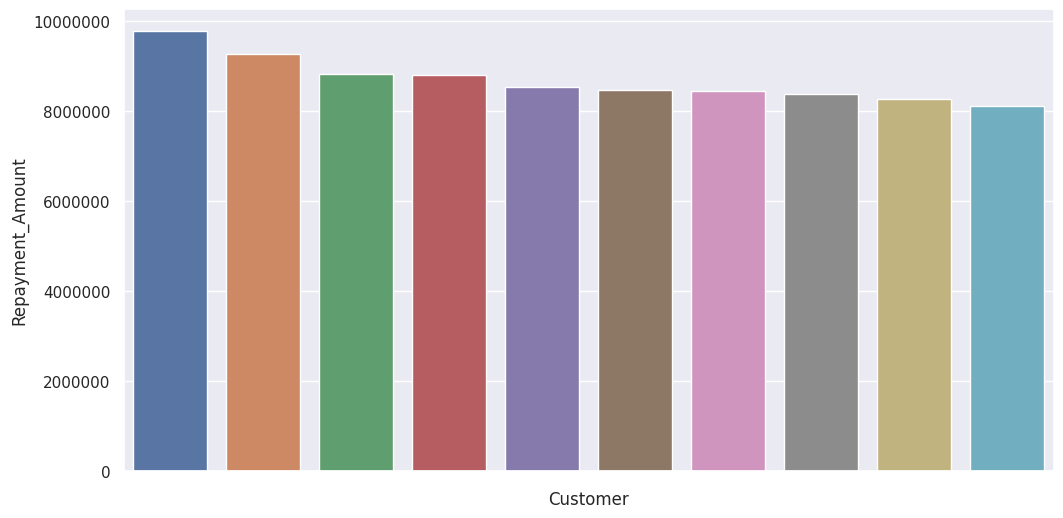

In [293]:
# Highest paying 10 Customers
sns.set(rc={'figure.figsize':(12,6)})
g = new_final_df.groupby('Customer', as_index=False)['Repayment_Amount'].sum().sort_values(by='Repayment_Amount', ascending=False).head(10)
sns.barplot(data=g, x='Customer', y='Repayment_Amount', hue='Customer', dodge=False).set(xticklabels=[])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

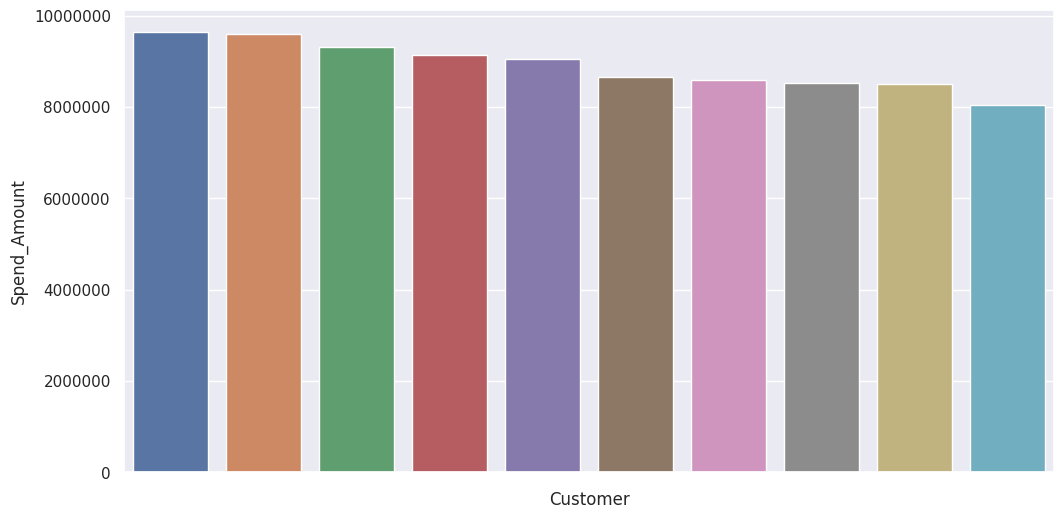

In [294]:
# Highest Spending 10 Customers
sns.set(rc={'figure.figsize':(12,6)})
g = new_final_df.groupby('Customer', as_index=False)['Spend_Amount'].sum().sort_values(by='Spend_Amount', ascending=False).head(10)
sns.barplot(data=g, x='Customer', y='Spend_Amount', hue='Customer', dodge=False).set(xticklabels=[])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

<Axes: ylabel='Spend_Amount'>

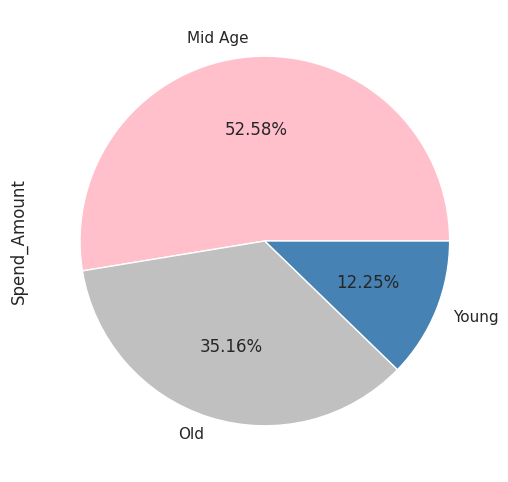

In [267]:
# Which age group is spending more money??
colors = ['pink', 'silver', 'steelblue']
new_final_df.groupby('Age_Bins')['Spend_Amount'].sum().plot(kind='pie', autopct='%0.2f%%',colors=colors)

Observation : -
mid-age customers contribute the highest spend at 52.58%, followed by older customers at 35.16%, and young customers at 12.25%.






<Axes: ylabel='Repayment_Amount'>

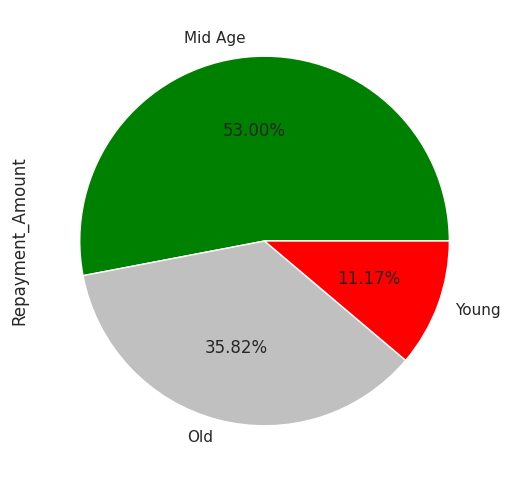

In [268]:
# Which age group is paying more money??
colors = ['green', 'silver', 'red']
new_final_df.groupby('Age_Bins')['Repayment_Amount'].sum().plot(kind='pie', autopct='%0.2f%%',colors=colors)

Observation :-
53% of repayments coming from our middle-aged customer segment, showcasing their significant contribution to overall repayment.

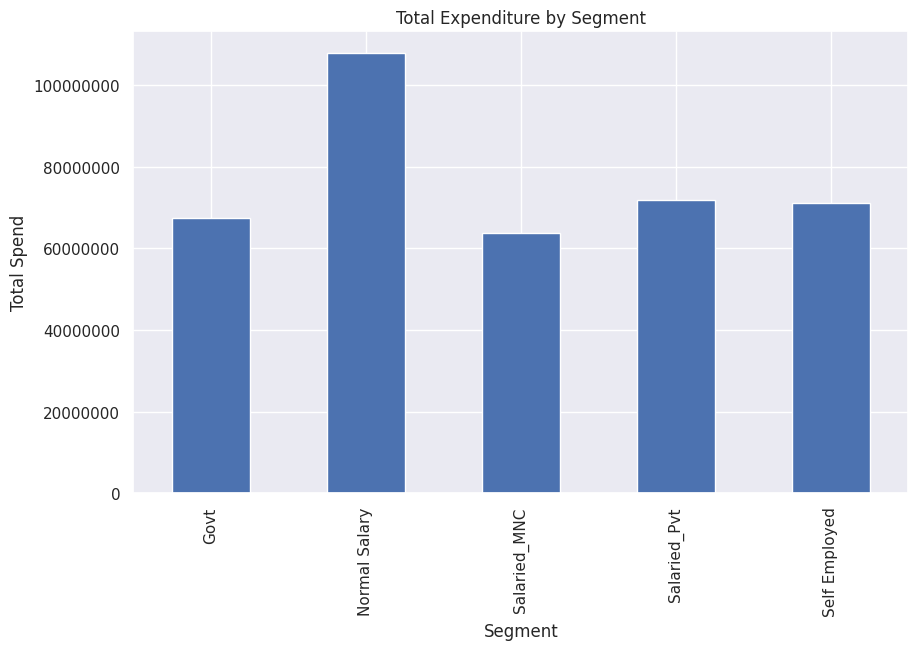

In [269]:
# People in which segment are spending more money??
new_final_df.groupby('Segment')['Spend_Amount'].sum().plot(kind='bar',title='Total Expenditure by Segment',
               ylabel='Total Spend', xlabel='Segment', figsize=(10, 6))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

Observation :-
The highest expenditure comes from Normal salaried, followed by Salaried_Pvt and then self-Employed.

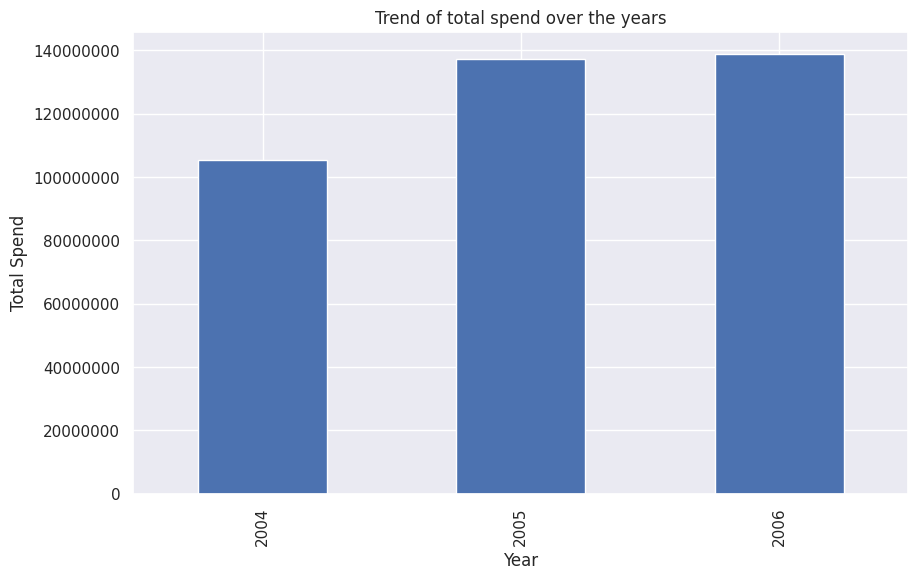

In [270]:
new_final_df.groupby('year')['Spend_Amount'].sum().plot(kind = 'bar',title='Trend of total spend over the years',
               ylabel='Total Spend', xlabel='Year', figsize=(10, 6))

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

Observation:- Spending has been consistently increasing each year from 2004 to 2006.

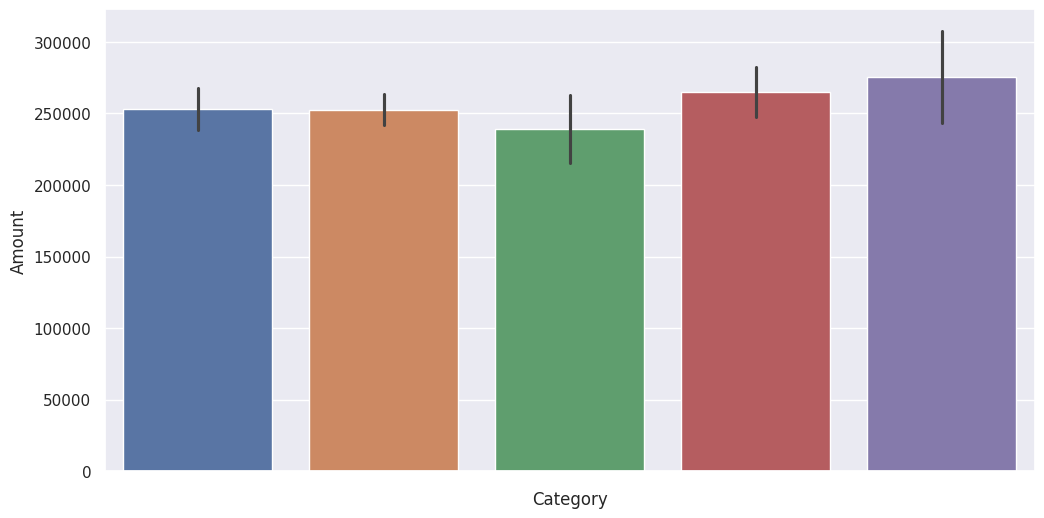

In [295]:
sns.set(rc={'figure.figsize':(12,6)})
g = cust_spend.groupby('Category', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data=cust_spend, x='Category', y='Amount', hue='Category', dodge=False).set(xticklabels=[])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

In [272]:
# Year wise Monthly spend of each customer
new_final_df[['Customer','month','year','Spend_Amount']]

,Customer,month,year,Spend_Amount
0,A1,1,2004,1511172.74628
1,A1,2,2004,41381.10587
2,A1,5,2004,131196.58782
3,A1,1,2005,398403.77181
4,A1,2,2005,1404193.04192
...,...,...,...,...
1097,A8,1,2006,0.00000
1098,A8,2,2006,0.00000
1099,A8,4,2006,0.00000
1100,A8,5,2006,0.00000


In [273]:
# Monthly spend of each customer
new_final_df.groupby(['Customer','month'],as_index=False)['Spend_Amount'].sum()

,Customer,month,Spend_Amount
0,A1,1,1909576.51809
1,A1,2,1445574.14779
2,A1,4,564506.85694
3,A1,5,131196.58782
4,A1,7,0.00000
...,...,...,...
677,A95,1,347833.87952
678,A96,1,320363.53570
679,A97,1,164330.04227
680,A98,1,87483.51199


In [274]:
# Monthly Repayment of each customer
new_final_df.groupby(['Customer','month'],as_index=False)['Repayment_Amount'].sum()

,Customer,month,Repayment_Amount
0,A1,1,1364357.20495
1,A1,2,1390987.63617
2,A1,4,371273.27436
3,A1,5,0.00000
4,A1,7,300581.70307
...,...,...,...
677,A95,1,75109.49223
678,A96,1,110139.01415
679,A97,1,174606.39228
680,A98,1,97802.59900


### Calculating Interest -
* Impose an interest rate of 2.9% for each customer for any due amount.

In [275]:
new_final_df.loc[(new_final_df.Spend_Amount - new_final_df.Repayment_Amount) > 0, 'Interest'] = ((new_final_df.Spend_Amount - new_final_df.Repayment_Amount) * 2.9)/(100*12)

In [276]:
new_final_df.head()

,Customer,year,month,Spend_Amount,City,Credit Card Product,Segment,Age_Bins,Repayment_Amount,Penality,Cashback,New_Limit,Interest
0,A1,2004,1,1511172.74628,BANGALORE,Gold,Self Employed,Mid Age,1362775.23512,10000.00000,0.00000,0.00000,358.62732
1,A1,2004,2,41381.10587,BANGALORE,Gold,Self Employed,Mid Age,191180.01162,0.00000,10000.00000,0.00000,NaN
2,A1,2004,5,131196.58782,BANGALORE,Gold,Self Employed,Mid Age,0.00000,0.00000,0.00000,0.00000,317.05842
3,A1,2005,1,398403.77181,BANGALORE,Gold,Self Employed,Mid Age,1581.96983,0.00000,0.00000,0.00000,958.98602
4,A1,2005,2,1404193.04192,BANGALORE,Gold,Self Employed,Mid Age,1199807.62455,10000.00000,0.00000,0.00000,493.93143


In [277]:
new_final_df.fillna(0,inplace=True)

### Calculating Monthly profit for the bank -

In [278]:
new_final_df['Monthly_Bank_Profit'] = ((new_final_df.Penality + new_final_df.Interest) - new_final_df.Cashback)

In [279]:
new_final_df['Monthly_Bank_Profit']

0       10358.62732
1      -10000.00000
2         317.05842
3         958.98602
4       10493.93143
           ...     
1097    -2000.04000
1098    -2000.04000
1099    -2000.04000
1100    -2000.04000
1101    -2000.06000
Name: Monthly_Bank_Profit, Length: 1102, dtype: float64

* Here there are some negative values ​​present in the Monthly_Bank_Profit column. The negative values in the "Monthly_Bank_Profit" column suggest monthly losses or deficits, indicating periods where the bank's expenses surpassed its revenue.

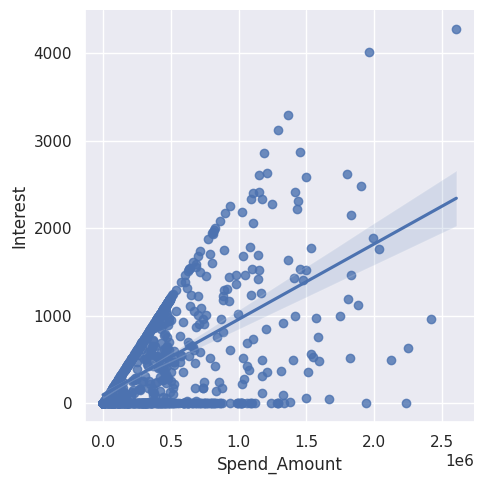

In [280]:
sns.lmplot(data=new_final_df, x='Spend_Amount', y='Interest', fit_reg=True)

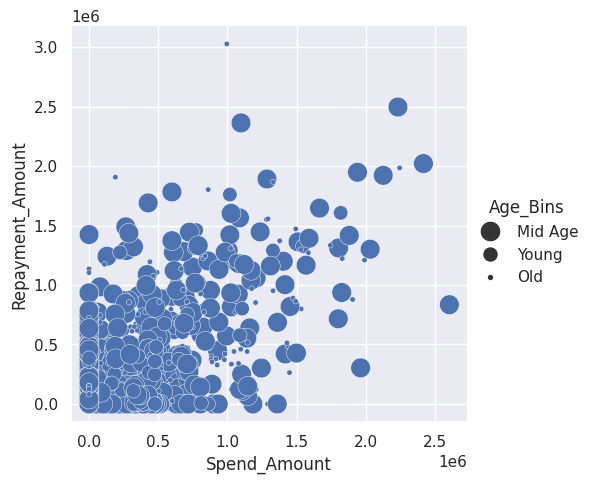

In [281]:
sns.relplot(data=new_final_df, x="Spend_Amount", y="Repayment_Amount", size="Age_Bins", sizes=(15, 200))

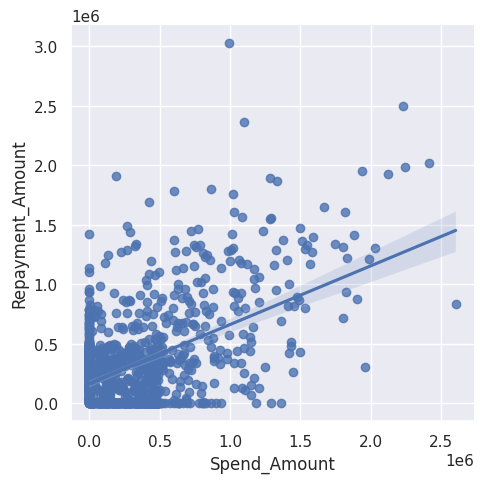

In [282]:
sns.lmplot(data=new_final_df, x='Spend_Amount', y='Repayment_Amount')

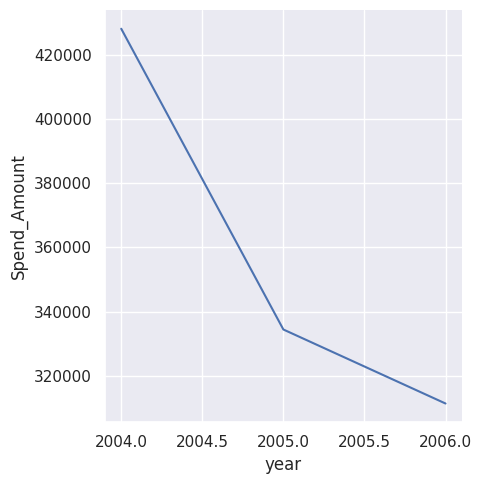

In [283]:
sns.relplot(data=new_final_df, x="year", y="Spend_Amount", kind="line",errorbar=None)

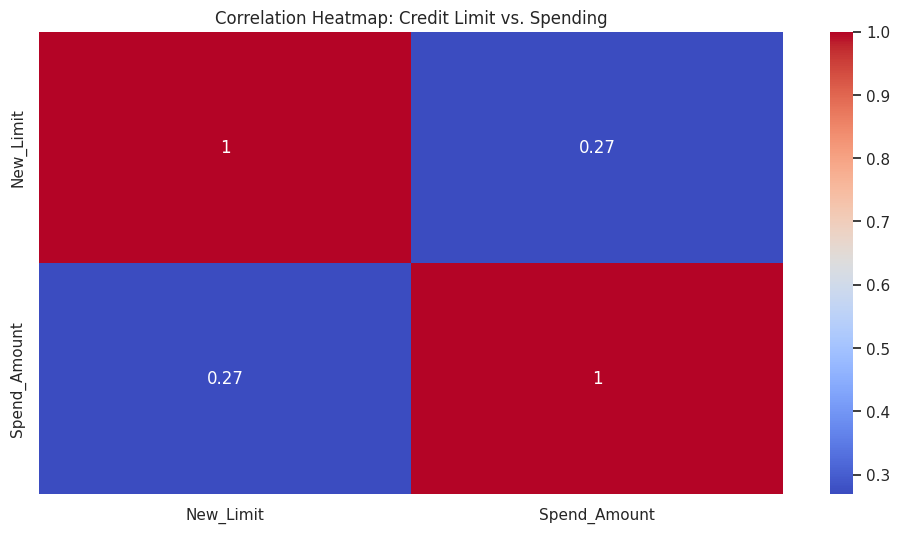

In [285]:
credit_spend_corr = new_final_df[['New_Limit', 'Spend_Amount']].corr()

# Heatmap for correlation visualization
sns.heatmap(credit_spend_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Credit Limit vs. Spending')
plt.show()

In [287]:
new_final_df

,Customer,year,month,Spend_Amount,City,Credit Card Product,Segment,Age_Bins,Repayment_Amount,Penality,Cashback,New_Limit,Interest,Monthly_Bank_Profit
0,A1,2004,1,1511172.74628,BANGALORE,Gold,Self Employed,Mid Age,1362775.23512,10000.00000,0.00000,0.00000,358.62732,10358.62732
1,A1,2004,2,41381.10587,BANGALORE,Gold,Self Employed,Mid Age,191180.01162,0.00000,10000.00000,0.00000,0.00000,-10000.00000
2,A1,2004,5,131196.58782,BANGALORE,Gold,Self Employed,Mid Age,0.00000,0.00000,0.00000,0.00000,317.05842,317.05842
3,A1,2005,1,398403.77181,BANGALORE,Gold,Self Employed,Mid Age,1581.96983,0.00000,0.00000,0.00000,958.98602,958.98602
4,A1,2005,2,1404193.04192,BANGALORE,Gold,Self Employed,Mid Age,1199807.62455,10000.00000,0.00000,0.00000,493.93143,10493.93143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,A8,2006,1,0.00000,PATNA,Silver,Salaried_Pvt,Old,318311.37941,0.00000,2000.04000,0.00000,0.00000,-2000.04000
1098,A8,2006,2,0.00000,PATNA,Silver,Salaried_Pvt,Old,148411.55803,0.00000,2000.04000,0.00000,0.00000,-2000.04000
1099,A8,2006,4,0.00000,PATNA,Silver,Salaried_Pvt,Old,126099.41716,0.00000,2000.04000,0.00000,0.00000,-2000.04000
1100,A8,2006,5,0.00000,PATNA,Silver,Salaried_Pvt,Old,80652.48295,0.00000,2000.04000,0.00000,0.00000,-2000.04000


2. Convert all the categorical variables into dummy variables

In [288]:
final_df_dummies = pd.get_dummies(new_final_df.drop(columns=['Customer']),drop_first=True)

In [289]:
final_df_dummies.head()

,year,month,Spend_Amount,Repayment_Amount,Penality,Cashback,New_Limit,Interest,Monthly_Bank_Profit,City_BOMBAY,...,City_PATNA,City_TRIVANDRUM,Credit Card Product_Platimum,Credit Card Product_Silver,Segment_Normal Salary,Segment_Salaried_MNC,Segment_Salaried_Pvt,Segment_Self Employed,Age_Bins_Old,Age_Bins_Young
0,2004,1,1511172.74628,1362775.23512,10000.00000,0.00000,0.00000,358.62732,10358.62732,0,...,0,0,0,0,0,0,0,1,0,0
1,2004,2,41381.10587,191180.01162,0.00000,10000.00000,0.00000,0.00000,-10000.00000,0,...,0,0,0,0,0,0,0,1,0,0
2,2004,5,131196.58782,0.00000,0.00000,0.00000,0.00000,317.05842,317.05842,0,...,0,0,0,0,0,0,0,1,0,0
3,2005,1,398403.77181,1581.96983,0.00000,0.00000,0.00000,958.98602,958.98602,0,...,0,0,0,0,0,0,0,1,0,0
4,2005,2,1404193.04192,1199807.62455,10000.00000,0.00000,0.00000,493.93143,10493.93143,0,...,0,0,0,0,0,0,0,1,0,0


<ipython-input-290-c0a9162621e1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_final_df.corr(), annot=True)


<Axes: >

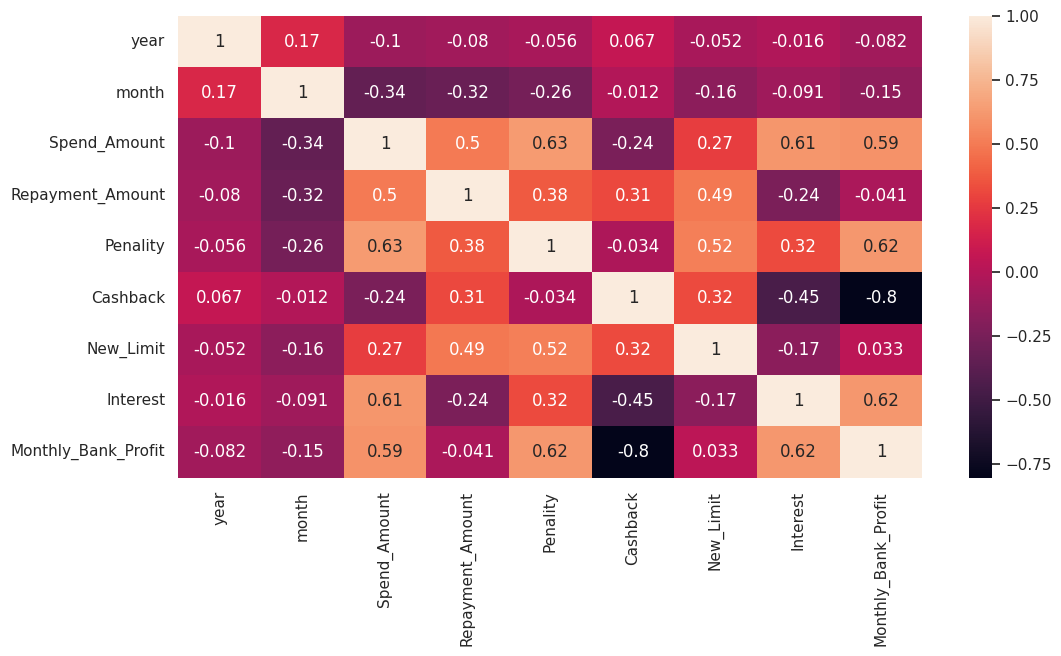

In [290]:
sns.heatmap(new_final_df.corr(), annot=True)

3. Build a corelation of all predictors

In [291]:
final_df_dummies.corr()

,year,month,Spend_Amount,Repayment_Amount,Penality,Cashback,New_Limit,Interest,Monthly_Bank_Profit,City_BOMBAY,...,City_PATNA,City_TRIVANDRUM,Credit Card Product_Platimum,Credit Card Product_Silver,Segment_Normal Salary,Segment_Salaried_MNC,Segment_Salaried_Pvt,Segment_Self Employed,Age_Bins_Old,Age_Bins_Young
year,1.00000,0.17141,-0.10327,-0.07960,-0.05598,0.06662,-0.05156,-0.01583,-0.08203,0.00593,...,-0.00368,-0.00911,0.01304,-0.04092,-0.01377,-0.01641,0.01130,0.00747,0.01753,-0.01852
month,0.17141,1.00000,-0.34298,-0.31642,-0.26411,-0.01231,-0.16367,-0.09137,-0.14793,0.01815,...,-0.04800,-0.00100,0.06185,-0.06366,0.01508,0.04581,-0.00777,-0.03385,0.01714,-0.04532
Spend_Amount,-0.10327,-0.34298,1.00000,0.49522,0.62754,-0.24332,0.27000,0.60927,0.59291,-0.01210,...,-0.02949,0.03484,-0.02621,0.00663,-0.02671,0.01455,0.01447,0.01842,0.03035,-0.00929
Repayment_Amount,-0.07960,-0.31642,0.49522,1.00000,0.38014,0.31050,0.49289,-0.23917,-0.04119,-0.01601,...,-0.02181,0.02977,-0.01534,-0.01338,-0.01494,0.01819,-0.00926,0.02659,0.04131,-0.03619
Penality,-0.05598,-0.26411,0.62754,0.38014,1.00000,-0.03390,0.51763,0.32053,0.61682,-0.00280,...,0.00363,0.01924,-0.13389,-0.05141,-0.03313,0.00493,0.00108,0.03048,0.04503,0.01005
Cashback,0.06662,-0.01231,-0.24332,0.31050,-0.03390,1.00000,0.32314,-0.45183,-0.80279,-0.03099,...,0.02786,-0.00800,-0.22637,-0.21415,-0.00411,-0.01797,-0.01389,0.07644,0.07984,-0.02851
New_Limit,-0.05156,-0.16367,0.27000,0.49289,0.51763,0.32314,1.00000,-0.17411,0.03303,-0.01577,...,0.04159,0.00073,-0.11834,-0.03304,-0.00073,0.02027,-0.02764,-0.03530,-0.01743,0.03239
Interest,-0.01583,-0.09137,0.60927,-0.23917,0.32053,-0.45183,-0.17411,1.00000,0.61541,-0.00401,...,-0.03117,-0.00749,0.01505,-0.01003,-0.00739,-0.01376,0.02973,-0.00390,0.02539,-0.00860
Monthly_Bank_Profit,-0.08203,-0.14793,0.59291,-0.04119,0.61682,-0.80279,0.03303,0.61541,1.00000,0.02087,...,-0.02173,0.01587,0.09363,0.12811,-0.01625,0.01458,0.01391,-0.03973,-0.03108,0.02575
City_BOMBAY,0.00593,0.01815,-0.01210,-0.01601,-0.00280,-0.03099,-0.01577,-0.00401,0.02087,1.00000,...,-0.11258,-0.11337,0.03019,-0.06669,0.04064,-0.07598,-0.19477,0.23088,-0.01040,-0.13393


Business Insights -
* Identified top 10 monthly spenders (A13, A22, A39, A40, A41, A42, A45, A48, A60, A61).
* Noted elevated spending levels in January.
* Recognized top 10 monthly repay customers (A22, A40,
  A41, A3, A45, A47, A48, A49, A60, A61).
* Highest-paying customers to the bank include A22, A40, A41, A3, A45, A47, A48, A49, A60, A61.
* Customers with Normal Salary exhibit higher spending.
* Customers with an average age of 49.29 contribute significantly to spending.
* Government segment proves to be the most profitable.
* Housing category sees higher customer spending.
* Identified customers spending but not repaying in * December (A16, A18, A20, A23, A3, A30, A35, A42, A46, A5, A51, A58, A61).
* Some customers only spend and repay in January, February, March, April.
* Negative values in "Monthly_Bank_Profit" suggest monthly losses.
* Consistent spending growth observed from 2004 to 2006.
* Middle-aged customers contribute 53% to overall repayments.
* Spending distribution: 52.58% mid-age, 35.16% old, 12.25% young.
* Repayment tends to peak in January and dip in October.



